## 4. brand_keyword_cnt.csv [파일] - 메타(Meta) 정보
브랜드 : 브랜드 코드<br>
2022-01-01 ~ 2023-04-04 : 브랜드의 연관키워드 언급량을 정규화한 일별 데이터<br><br>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

brand_keyword = pd.read_csv('./brand_keyword_cnt.csv')

In [36]:
brand_keyword.head()

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0.84131,0.91383,1.450530,2.422390,1.871190,1.581080,1.232950,1.174930,1.145920,...,0.319110,0.391640,0.377130,0.49318,0.072520,0.29010,0.31911,0.232080,0.333620,0.44966
1,B002-00002,12.64868,20.27850,15.332170,12.750210,13.562510,13.707570,11.937910,15.564250,14.084710,...,10.269790,11.966920,10.646930,10.41485,10.487380,9.48651,9.28343,10.429350,11.154620,11.38671
2,B002-00003,0.33362,0.43516,0.362630,0.174060,0.217580,0.464170,0.420650,0.290100,0.377130,...,0.536690,0.696250,0.449660,0.39164,1.029880,0.49318,0.91383,0.797790,1.015370,0.88482
3,B002-00005,1.07339,1.71163,2.016240,1.914700,1.987230,2.146790,1.682620,1.378000,1.421520,...,2.219320,2.509420,2.872060,2.37888,2.030750,1.53756,1.34899,1.261960,2.320850,2.30635
4,B002-00006,0.00000,0.00000,0.188558,0.246574,0.246574,0.246574,0.377139,0.087012,0.261084,...,0.072526,0.290103,0.087012,0.00000,0.130542,0.00000,0.00000,0.072526,0.217577,0.00000


In [28]:
print('데이터 구조는:', brand_keyword.shape,'\n')
print('데이터 타입은:', brand_keyword.dtypes,'\n')
print('데이터 칼럼은:', brand_keyword.columns,'\n')
print('데이터 첫번째 행은:', brand_keyword.iloc[0],'\n')

데이터 구조는: (3170, 460) 

데이터 타입은: 브랜드            object
2022-01-01    float64
2022-01-02    float64
2022-01-03    float64
2022-01-04    float64
               ...   
2023-03-31    float64
2023-04-01    float64
2023-04-02    float64
2023-04-03    float64
2023-04-04    float64
Length: 460, dtype: object 

데이터 칼럼은: Index(['브랜드', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
       '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
       ...
       '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
       '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04'],
      dtype='object', length=460) 

데이터 첫번째 행은: 브랜드           B002-00001
2022-01-01       0.84131
2022-01-02       0.91383
2022-01-03       1.45053
2022-01-04       2.42239
                 ...    
2023-03-31        0.2901
2023-04-01       0.31911
2023-04-02       0.23208
2023-04-03       0.33362
2023-04-04       0.44966
Name: 0, Length: 460, dtype: object 



In [29]:
brand_keyword.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  2022-01-05  \
0     False       False       False       False       False       False   
1     False       False       False       False       False       False   
2     False       False       False       False       False       False   
3     False       False       False       False       False       False   
4     False       False       False       False       False       False   
...     ...         ...         ...         ...         ...         ...   
3165  False       False       False       False       False       False   
3166  False       False       False       False       False       False   
3167  False       False       False       False       False       False   
3168  False       False       False       False       False       False   
3169  False       False       False       False       False       False   

      2022-01-06  2022-01-07  2022-01

In [40]:
print(brand_keyword.columns)

Index(['브랜드', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
       '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
       ...
       '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
       '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04'],
      dtype='object', length=460)


## 칼럼 이름을 datetime 형식으로 변환 & '브랜드' 열을 인덱스로 설정

In [53]:
data = brand_keyword
new_df = pd.DataFrame(data)

# '브랜드' 열을 인덱스로 설정
new_df.set_index('브랜드', inplace=True)

# 칼럼 이름을 datetime 형식으로 변환
date_columns = new_df.columns
new_df.columns = pd.to_datetime(date_columns)

# 데이터프레임 출력
new_df.head()

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
브랜드,,,,,,,,,,,,,,,,,,,,,
B002-00001,0.84131,0.91383,1.450530,2.422390,1.871190,1.581080,1.232950,1.174930,1.145920,1.232950,...,0.319110,0.391640,0.377130,0.49318,0.072520,0.29010,0.31911,0.232080,0.333620,0.44966
B002-00002,12.64868,20.27850,15.332170,12.750210,13.562510,13.707570,11.937910,15.564250,14.084710,16.231500,...,10.269790,11.966920,10.646930,10.41485,10.487380,9.48651,9.28343,10.429350,11.154620,11.38671
B002-00003,0.33362,0.43516,0.362630,0.174060,0.217580,0.464170,0.420650,0.290100,0.377130,0.754270,...,0.536690,0.696250,0.449660,0.39164,1.029880,0.49318,0.91383,0.797790,1.015370,0.88482
B002-00005,1.07339,1.71163,2.016240,1.914700,1.987230,2.146790,1.682620,1.378000,1.421520,2.610960,...,2.219320,2.509420,2.872060,2.37888,2.030750,1.53756,1.34899,1.261960,2.320850,2.30635
B002-00006,0.00000,0.00000,0.188558,0.246574,0.246574,0.246574,0.377139,0.087012,0.261084,0.333609,...,0.072526,0.290103,0.087012,0.00000,0.130542,0.00000,0.00000,0.072526,0.217577,0.00000


In [54]:
print(new_df.columns)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-01', '2023-04-02',
               '2023-04-03', '2023-04-04'],
              dtype='datetime64[ns]', length=459, freq=None)


In [56]:
print(new_df.shape)

(3170, 459)


## Transpose (시계열)

In [67]:
new = new_df.transpose()
new.index.name = 'date'
new.head()

브랜드,B002-00001,B002-00002,B002-00003,B002-00005,B002-00006,B002-00007,B002-00008,B002-00009,B002-00010,B002-00011,...,B002-03789,B002-03790,B002-03791,B002-03792,B002-03793,B002-03794,B002-03795,B002-03796,B002-03798,B002-03799
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.84131,12.64868,0.33362,1.07339,0.000000,0.884820,0.0,0.232064,0.33362,4.33710,...,0.0,14.07020,2.77052,1.07339,0.0,2.32085,0.14505,0.0,0.14505,4.55468
2022-01-02,0.91383,20.27850,0.43516,1.71163,0.000000,1.624588,0.0,0.246574,0.44966,6.38236,...,0.0,17.44995,3.64084,1.34899,0.0,2.98810,0.00000,0.0,0.00000,5.54105
2022-01-03,1.45053,15.33217,0.36263,2.01624,0.188558,1.914691,0.0,0.464151,0.55120,6.61444,...,0.0,19.64026,4.90281,1.53756,0.0,3.61183,0.08703,0.0,0.11604,6.15027
2022-01-04,2.42239,12.75021,0.17406,1.91470,0.246574,1.697114,0.0,0.377139,0.52219,6.29532,...,0.0,17.11633,6.45488,1.18944,0.0,4.06150,0.07252,0.0,0.07252,6.39686
2022-01-05,1.87119,13.56251,0.21758,1.98723,0.246574,1.595591,0.0,0.580207,0.47867,6.19379,...,0.0,17.60951,5.74412,1.40702,0.0,3.66985,0.08703,0.0,0.11604,7.00609


In [64]:
new.index.name = 'date'
new.head()

브랜드,B002-00001,B002-00002,B002-00003,B002-00005,B002-00006,B002-00007,B002-00008,B002-00009,B002-00010,B002-00011,...,B002-03789,B002-03790,B002-03791,B002-03792,B002-03793,B002-03794,B002-03795,B002-03796,B002-03798,B002-03799
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.84131,12.64868,0.33362,1.07339,0.000000,0.884820,0.0,0.232064,0.33362,4.33710,...,0.0,14.07020,2.77052,1.07339,0.0,2.32085,0.14505,0.0,0.14505,4.55468
2022-01-02,0.91383,20.27850,0.43516,1.71163,0.000000,1.624588,0.0,0.246574,0.44966,6.38236,...,0.0,17.44995,3.64084,1.34899,0.0,2.98810,0.00000,0.0,0.00000,5.54105
2022-01-03,1.45053,15.33217,0.36263,2.01624,0.188558,1.914691,0.0,0.464151,0.55120,6.61444,...,0.0,19.64026,4.90281,1.53756,0.0,3.61183,0.08703,0.0,0.11604,6.15027
2022-01-04,2.42239,12.75021,0.17406,1.91470,0.246574,1.697114,0.0,0.377139,0.52219,6.29532,...,0.0,17.11633,6.45488,1.18944,0.0,4.06150,0.07252,0.0,0.07252,6.39686
2022-01-05,1.87119,13.56251,0.21758,1.98723,0.246574,1.595591,0.0,0.580207,0.47867,6.19379,...,0.0,17.60951,5.74412,1.40702,0.0,3.66985,0.08703,0.0,0.11604,7.00609


## 그래프

 ...]

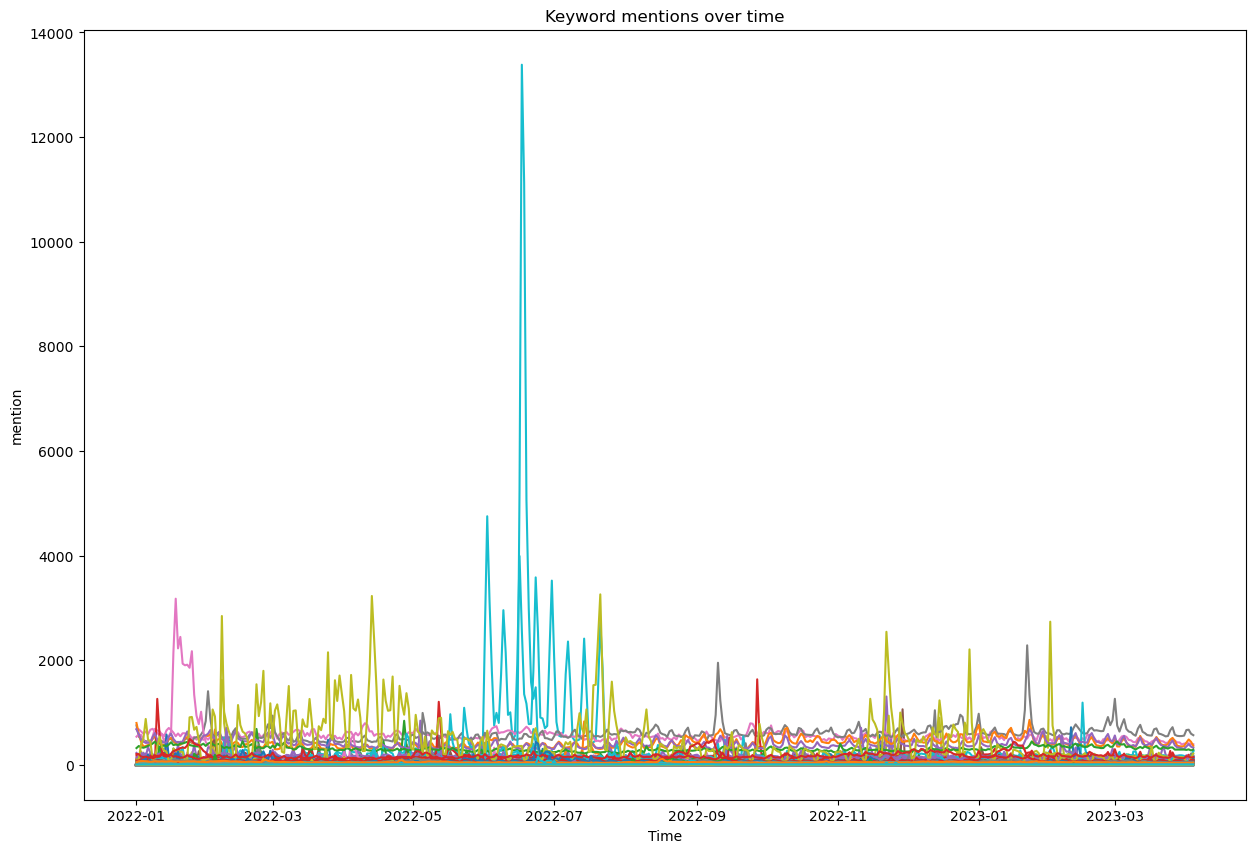

In [75]:
plt.figure(figsize=(15,10))
plt.title('Keyword mentions over time')
plt.xlabel('Time')
plt.ylabel('mention')
plt.plot(new)

In [78]:
plt.figure(figsize=(10,6))
plt.plot(new.rolling(window=10,center=False).mean(),label='Rolling Mean');  # 이동편균 계산
plt.plot(new.rolling(window=10,center=False).std(),label='Rolling sd');     # 이동표준편차 계산
plt.legend()
plt.show()

ValueError: Image size of 840x132818 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>